In [1]:
# number of data 
n.data <- c(1, 10, 50, 100, 1000, 5000)
n.sample <- 200

In [2]:
# real position of the lighthouse
a.true <- 1		# km
b.true <- 1.5 	# km

In [3]:
a <- seq(-2, 2, 4/n.sample)
b <- seq(1, 3,	2/n.sample)

The posterior distribution is proportional to the likelihood
$$P(\alpha, \beta|D) \propto P(D|\alpha, \beta) = \prod_i \frac{1}{\pi}\frac{\beta}{\beta^2 + (x_i -\alpha)^2}$$

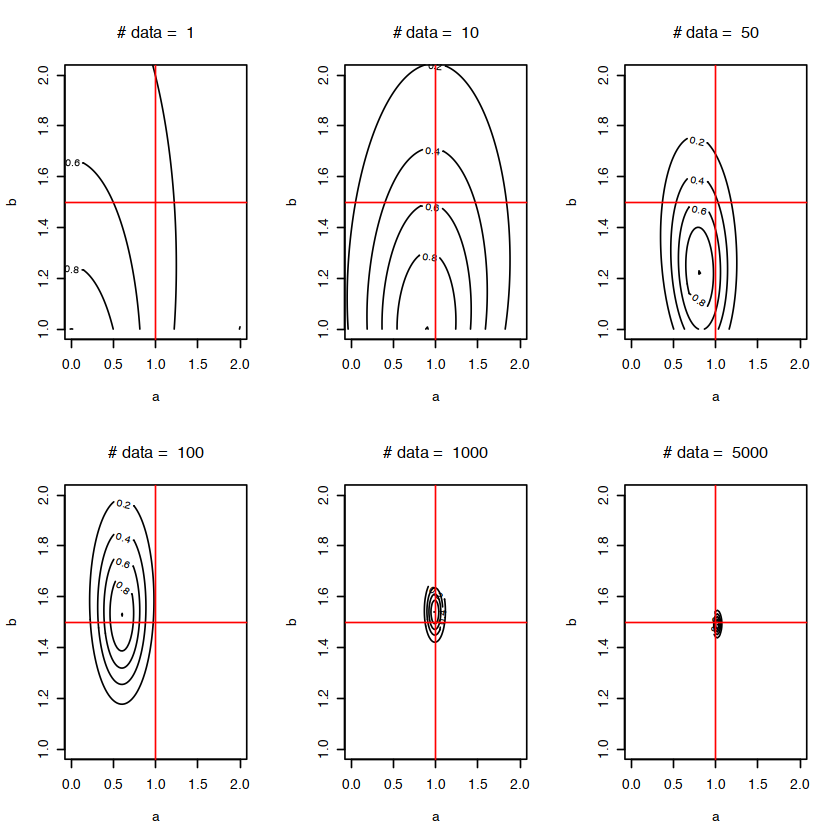

In [9]:
# plot in the same window
par(mfrow = c(2, 3))

for(i in n.data){
    # angle of emission
	theta <- runif(i, 0, pi)

	# position of the flash arrival
	data <- a.true + b.true * tan(theta)

	# take the logarithm of the likelihood (posterior)
    # calculate the log of the posterior on a grid {a_i, b_i}
	logL <- matrix(1, nrow = length(a), ncol = length(b))

	for(x in data){
		for(j in 1:length(a)){
			for(k in 1:length(b)){
				logL[j,k] <- logL[j,k] + log(b[k] / (b[k]^2 + (x - a[j])^2))
			}
		}
	}

    # set maximum to zero and calculate the posterior
	post <- logL - max(logL)
	post <- exp(post)

    # plot values of a and b with lines of constant probability density
	contour(a, b, post,
		nlevels = 5,
		labcex = 0.5,
		xlim = c(0, 2), ylim = c(1, 2),
		main = paste("# data = ", i),
		xlab = "a", ylab = "b")
	abline(v = a.true,
		col = "red")
	abline(h = b.true,
		col = "red")
}

In [16]:
# create a dataframe from the matrix
df <- matrix(0, nrow = length(a)*length(b), ncol = 3)
val <- 1

for(j in 1:length(a)){
	for(k in 1:length(b)){
		df[val,1] <- a[j]
		df[val,2] <- b[k]
		df[val,3] <- post[j,k]

		val <- val+1
	}
}

df <- as.data.frame(df)
best_a <- df$V1[which.max(df$V3)]
best_b <- df$V2[which.max(df$V3)]

cat(paste("The best esteem for a and b are: a =", best_a, ", and b =", best_b))

The best esteem for a and b are: a = 1.02 , and b = 1.49